In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

df = pd.read_csv(r'C:\Ach 6\Data\Original\boatdata.csv', index_col = False)
df

,Price,$ per sqr meter,Boat Type,Manufacturer,Type,Year Built,Length,Width,Meter Squared,Material,Location,Number of views last 7 days,Latitude,Longitude
0,3430.70,654.738730,Sport Boat,Marine power boats,new boat from stock,2007,3.69,1.42,5.2398,Aluminium,Switzerland Ã‚Â» Lake of Zurich Ã‚Â» StÃƒÂ¤fa ZH,124,47.222522,8.752711
1,3331.02,642.681845,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,5.1830,Aluminium,Germany Ã‚Â» Bayern Ã‚Â» MÃƒÂ¼nchen,58,51.165691,10.451526
2,3321.50,528.329198,Sport Boat,Linder power boats,new boat from stock,2007,4.03,1.56,6.2868,Aluminium,Switzerland Ã‚Â» Lake Constance Ã‚Â» Uttwil,132,47.583499,9.340498
3,3166.80,543.815362,Fishing Boat,Marine power boats,new boat from stock,2007,4.13,1.41,5.8233,Aluminium,Switzerland Ã‚Â» Lake of Zurich Ã‚Â» StÃƒÂ¤fa ...,145,47.222522,8.752711
4,4186.00,576.584022,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,7.2600,Aluminium,Switzerland Ã‚Â» Zugersee Ã‚Â» Neuheim,113,47.204778,8.575354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,45500.00,3263.988522,"Classic,Runabout",Faul power boats,Used boat,2007,8.20,1.70,13.9400,Wood,Switzerland Ã‚Â» Lake Constance Ã‚Â» Altnau,247,47.610645,9.257320
6987,45500.00,4373.317955,"Classic,Runabout",Boesch power boats,"Used boat,Unleaded",1979,5.10,2.04,10.4040,Wood,Switzerland Ã‚Â» Thunersee Ã‚Â» 3018 Bern,149,46.940027,7.390333
6988,44100.00,3937.500000,"Classic,Runabout,Sport Boat",Boesch power boats,"Used boat,Unleaded",1961,5.60,2.00,11.2000,Wood,Germany Ã‚Â» DieÃƒÂŸen am Ammersee,237,48.009595,11.117341
6989,44100.00,2874.837027,Sport Boat,Boesch power boats,Used boat,1980,5.90,2.60,15.3400,Wood,Austria Ã‚Â» WÃƒÂ¶rthersee Ã‚Â» 9065 Ebenthal ...,154,46.587168,14.390760


In [29]:
df.shape

(6991, 14)

In [30]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [33]:
df1 = df[['Price', 'Year Built', '$ per sqr meter', 'Meter Squared']]

In [34]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 


score

[-3313918059608803.5,
 -1388396648190376.2,
 -794074599360593.1,
 -516036297361246.06,
 -329485351820999.5,
 -207306203157636.44,
 -144085398041763.38,
 -100848090317024.95,
 -77586353013904.03]

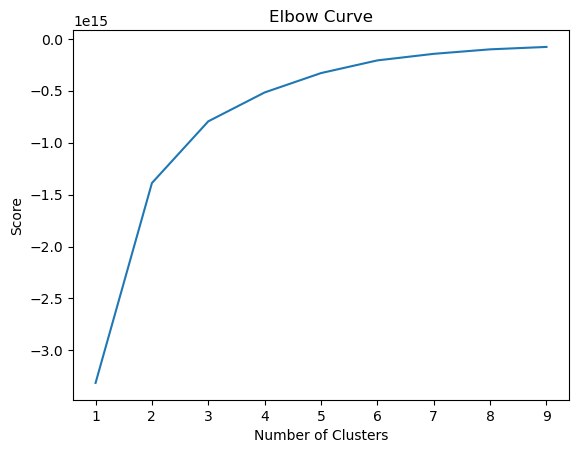

In [35]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### k-means clustering

In [36]:
kmeans = KMeans(n_clusters = 3) 
kmeans.fit(df1)

KMeans(n_clusters=3)

In [37]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\odarc\AppData\Local\Temp\ipykernel_16344\865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [38]:
df1.head()

,Price,Year Built,$ per sqr meter,Meter Squared,clusters
0,3430.70,2007,654.738730,5.2398,2
1,3331.02,2019,642.681845,5.1830,2
2,3321.50,2007,528.329198,6.2868,2
3,3166.80,2007,543.815362,5.8233,2
4,4186.00,2020,576.584022,7.2600,2


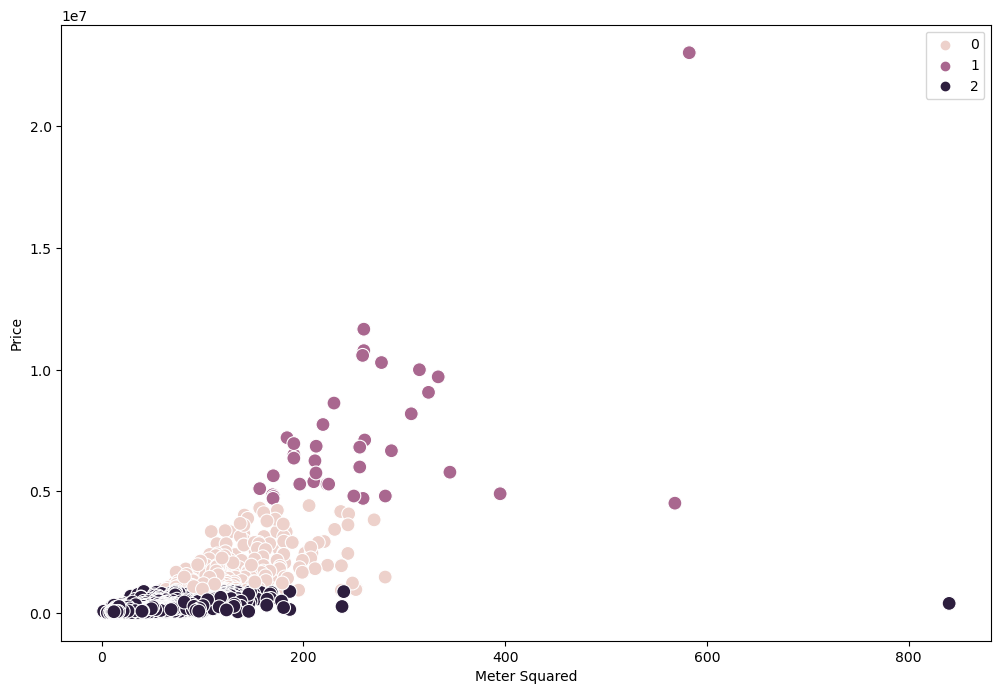

In [39]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Meter Squared'], y=df1['Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Meter Squared')
plt.ylabel('Price')
plt.show()

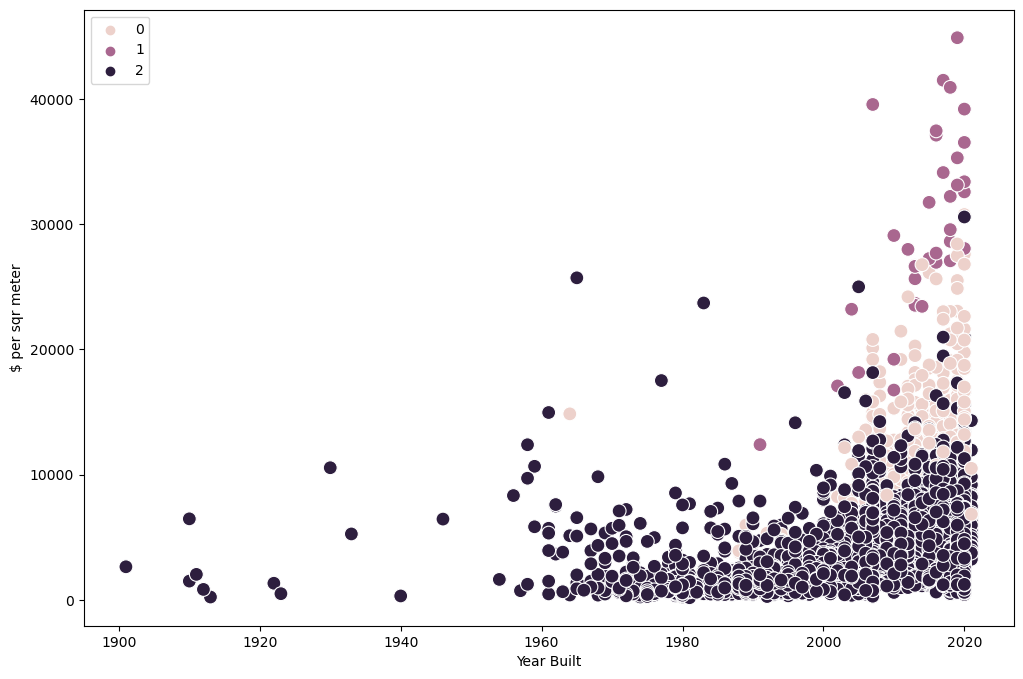

In [40]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Year Built'], y=df1['$ per sqr meter'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Year Built')
plt.ylabel('$ per sqr meter')
plt.show()

In [43]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\odarc\AppData\Local\Temp\ipykernel_16344\2078207149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'


In [44]:
df1.groupby('cluster').agg({'Price':['mean', 'median'], 
                         '$ per sqr meter':['mean', 'median'], 
                         'Year Built':['mean', 'median'],
                          'Meter Squared':['mean', 'median']})

Price            $ per sqr meter                \
                     mean     median            mean        median   
cluster                                                              
dark purple  1.524301e+05    83202.0     3544.168187   2892.480968   
pink         1.682570e+06  1423000.0    13480.171822  12897.061915   
purple       7.241433e+06  6360000.0    28807.591215  28047.692810   

              Year Built         Meter Squared             
                    mean  median          mean     median  
cluster                                                    
dark purple  2006.548057  2007.0     38.063448   30.00000  
pink         2012.658228  2013.0    127.170239  119.56985  
purple       2013.648649  2016.0    259.735062  250.00370